<div id="container" style="position:relative;">
<div style="float:left"><h1>  

# Project: Deliverable - Depression Data Analysis - BrainStation

## Data Loading and Cleaning

#### Author: Gennaro Costantino

#### Contact: guillarogennaro@gmail.com

#### Date: Aug-Sep, 2024
    
</h1></div>

<div style="position:relative; float:right">
  <img style="height:130px" src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*lzX0I82X916EpWbhTPiPJg.png"/>
</div>
    

# Steps:

1. [Step 1: Data Loading & Cleaning](#step1)

# Step 1: Data Loading & Cleaning <a class="anchor" id="step1"></a>
## Table of Contents
---
1. [Project Overview](#introduction)
2. [Key Questions](#keyquestions)
3. [Methods Used for Analysis](#methods)
    -[Loading Libraries](#libs)
4. [Data Set](#dataset)
    - [Data Dictionary](#dict)
5. [Initial Data Cleaning](#cleaning)
    - [Plan of Action](#action)
    - [Data Loading](#load)
    - [Data Assessment](#assess)
    - [Handling Missing Values](#missing)
6. [Findings Summary](#findings)
    - [Next Steps](#next)

## Project Overview <a class="anchor" id="introduction"></a>
---

### Depression Data Analysis

This project focuses on analyzing a dataset related to personal and lifestyle attributes to explore potential risk factors for depression. The aim is to understand how various factors such as age, lifestyle habits, and medical history may contribute to mental health outcomes. By analyzing these data points, we hope to identify patterns and correlations that could inform future research or intervention strategies.

### Key Objectives
- Identify Risk Factors: Determine the most common attributes associated with depression.
- Correlate Lifestyle Choices: Explore how lifestyle choices (e.g., smoking, physical activity, diet) relate to mental health.
- Predictive Modeling: Develop models that can predict the likelihood of depression based on personal and lifestyle attributes.thout the need to read the code.

## Key Questions <a class="anchor" id="keyquestions"></a>
---

- What are the common risk factors associated with depression?
- How do lifestyle choices, such as smoking and physical activity, correlate with mental health outcomes?
- Can we predict the likelihood of depression based on these attributes?

## Methods Used for Analysis <a class="anchor" id="methods"></a>
---

- Exploratory Data Analysis (EDA): To uncover patterns, trends, and relationships in the data.
- Data Preprocessing: For cleaning and preparing the data for analysis.
- Predictive Modeling: To develop and evaluate models that predict depression risk.
- Evaluation Metrics: To measure the performance of the models and validate findings.

I used `Python 3` in `Jupyter Lab` and its associated libraries:
 - Pandas
- Matplotlib
- Ploty
- Numpy
- Seasborn
- Matplotlib 
- Scipy
- Sklearn

We will load necesssary libraries below. More libraries will be loaded as needed for analysis.

## Loading the Necessary Libraries<a class="anchor" id="load"></a>
---

In [12]:
#load the necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import string
import nltk

# Downloading the WordNet corpus
nltk.download('wordnet')

from scipy import stats
from scipy.stats import norm, chi2_contingency, f_oneway

#filter warnings
from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #Lemmatization: Converts a word to its root form based on its meaning.
from sklearn.preprocessing import StandardScaler, MinMaxScaler, label_binarize, LabelEncoder  
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score 
from sklearn.svm import SVC 
from sklearn.multiclass import OneVsOneClassifier 
from sklearn.calibration import CalibratedClassifierCV
from tempfile import mkdtemp 
from sklearn.decomposition import KernelPCA, PCA
from imblearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Set <a class="anchor" id="dataset"></a>
---
The dataset consists of 413,768 records and 16 attributes, each representing various personal and lifestyle characteristics of individuals. The dataset aims to provide a comprehensive overview of factors that may influence mental health, particularly focusing on aspects related to depression. The attributes include demographic information (e.g., age, marital status, education), lifestyle factors (e.g., smoking status, physical activity level, alcohol consumption), and medical history (e.g., history of mental illness, substance abuse, chronic medical conditions).


### Data Dictionary <a class="anchor" id="dict"></a>

To help with the analysis, study the data dictionary below.

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Description</th>
  </tr>
  <tr>
    <td>Name</td>
    <td>The name of the individual (anonymized for privacy).</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>The age of the individual (in years).</td>
  </tr>
  <tr>
    <td>Marital Status</td>
    <td>The marital status (e.g., Single, Married, Divorced, Widowed).</td>
  </tr>
  <tr>
    <td>Education Level</td>
    <td>The highest level of education attained (e.g., High School, Bachelor's, Master's).</td>
  </tr>
  <tr>
    <td>Number of Children</td>
    <td>The number of children the individual has.</td>
  </tr>
  <tr>
    <td>Smoking Status</td>
    <td>Indicates whether the individual is a smoker or non-smoker.</td>
  </tr>
  <tr>
    <td>Physical Activity Level</td>
    <td>The level of physical activity (e.g., Sedentary, Moderate, Active).</td>
  </tr>
  <tr>
    <td>Employment Status</td>
    <td>Employment status (e.g., Employed, Unemployed, Retired).</td>
  </tr>
  <tr>
    <td>Income</td>
    <td>Annual income of the individual (in USD).</td>
  </tr>
  <tr>
    <td>Alcohol Consumption</td>
    <td>Level of alcohol consumption (e.g., Low, Moderate, High).</td>
  </tr>
  <tr>
    <td>Dietary Habits</td>
    <td>Indicates the dietary habits (e.g., Healthy, Moderate, Unhealthy).</td>
  </tr>
  <tr>
    <td>Sleep Patterns</td>
    <td>Quality of sleep (e.g., Good, Fair, Poor).</td>
  </tr>
  <tr>
    <td>History of Mental Illness</td>
    <td>Whether the individual has a history of mental health issues (Yes/No).</td>
  </tr>
  <tr>
    <td>History of Substance Abuse</td>
    <td>Indicates if there is a history of substance abuse (Yes/No).</td>
  </tr>
  <tr>
    <td>Family History of Depression</td>
    <td>Indicates if there is a family history of depression (Yes/No).</td>
  </tr>
  <tr>
    <td>Chronic Medical Conditions</td>
    <td>Whether the individual has chronic medical conditions (Yes/No).</td>
  </tr>
</table>


## Initial Data Cleaning <a class="anchor" id="cleaning"></a>
---


### Plan of action <a class="anchor" id="action"></a>

1. Data Loading
2. Initial Data Assessment
2. Data Cleaning
    - Dealing with duplicated values
    - Dealing with redundant columns
    - Dealing with null values
3. EDA 
4. Draw insights
5. Formulate a conclusion

### Data Loading <a class="anchor" id="load"></a>
---

In [19]:
# Reading the CSV file downloaded from Kaggle
df = pd.read_csv(r'C:\Users\User\Documents\Brain Station\Data Science\Capstone\Capstone_Project_Depression Data Analysis\data\depression_data.csv')

In [20]:
# New DF 
df.head(4)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No


### Data Assesment <a class="anchor" id="assess"></a>
---

First lets take a look at the number of rows and columns in this data set

In [23]:
# Check the shape of the data:
df.shape

(413768, 16)

In [24]:
# Checking the value counts from our target
df['History of Mental Illness'].value_counts()

History of Mental Illness
No     287943
Yes    125825
Name: count, dtype: int64

**Observations:** 

The dataset contains 413,768 entries and 16 columns.

---


Next let familiarize ourselves with the data by checking th information contained in the data set.

Next Steps:
- Check data types and formats
- Check data types Date column (transfor obejct to date format)
- Check for duplicates
- Check missing data

---

In [28]:
df.info() # There is no nan values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

**Observations:**

This data set contains the following data types:

- `float64`(1)
- `int64`(2)
- `obect`(13)

There seems to not be columns with null values.

---

Next we will take a look at the number duplicate rows in the dataframe

In [31]:
# Check the number of duplicated rows. There are no duplicate rows in the dataset.
df.duplicated().sum()

0

In [32]:
# Identify all rows that are duplicated including their first occurrences
duplicate_rows_with_original = df[df.duplicated(keep=False)]

# Display the first two sets of duplicated rows with their original counterparts
duplicate_rows_with_original.head(4)  # showing both original and duplicated rows


,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions


**Observations:**

No duplicate entries were found.

---


Next we will take a look if any columns are duplicated by transposing the dataframe and running the duplicated function from above.

In [35]:
# Transpose the data frame and then look for duplicated rows to determine if any of the columns are duplicated:
#df.T.duplicated().sum() # this will take time to run!

**Observations:**

There is no duplicated columns in this data frame. 

---

### Handling Missing Values <a class="anchor" id="missing"></a>

In [38]:
# Checking for missing values in each column. There are no missing values in the dataset. 
missing_values = df.isnull().sum()
print(missing_values)

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


In [39]:
#check for missing values:
null_counts = df.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls
#lets take a look at the percentage of the data that these nulls make up
percentage_nulls = columns_with_nulls/df.shape[0]*100
percentage_nulls

Series([], dtype: float64)

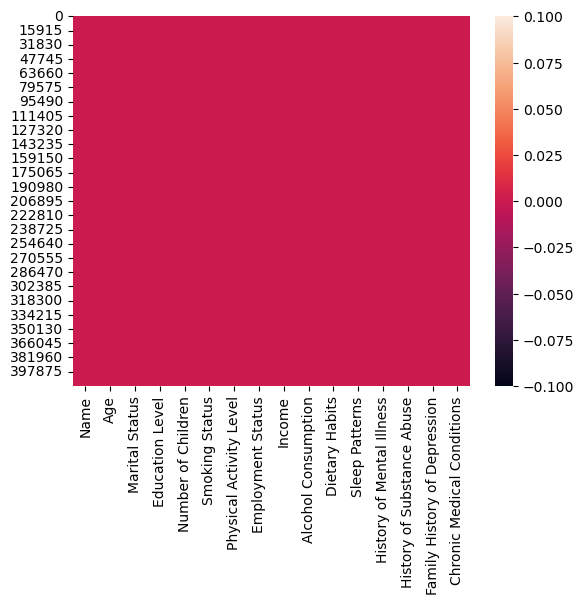

In [40]:
# Visualize missing data using a heatmap
sns.heatmap(df.isnull())
plt.show()

**Observations:**

There is no missing values.

---

## Finding Summary <a class="anchor" id="findings"></a>

The data has been assessed and cleaned by performing the following steps:

- Checking for duplicated
- Checking redundant or insignificant rows
- Checking columns with a high proportion of null values
- Converting date datatype to date format

Before we move forward let's create a copy of our df:

In [43]:
df_2 = df.copy()

In [44]:
# For sanity lets check the DF info and see if the total rows decreased by 539. Total should be 515199

In [45]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

## Understanding the Categorical Data Type for Future Analysis:

In [47]:
# Displaing the distribution of categorical columns:
for column in df_2.select_dtypes(include=['object']).columns:
    print(df_2[column].value_counts())

Name
Michael Smith      198
Michael Johnson    147
David Smith        131
Robert Smith       128
David Johnson      126
                  ... 
Corey Moore          1
Carl Ballard         1
Carla Mcgrath        1
Cory Wise            1
Gary Faulkner        1
Name: count, Length: 196851, dtype: int64
Marital Status
Married     240444
Single       72110
Widowed      68485
Divorced     32729
Name: count, dtype: int64
Education Level
Bachelor's Degree    124329
High School          118927
Associate Degree      79999
Master's Degree       73768
PhD                   16745
Name: count, dtype: int64
Smoking Status
Non-smoker    247416
Former        116184
Current        50168
Name: count, dtype: int64
Physical Activity Level
Sedentary    176850
Moderate     158013
Active        78905
Name: count, dtype: int64
Employment Status
Employed      265659
Unemployed    148109
Name: count, dtype: int64
Alcohol Consumption
Moderate    173440
Low         139250
High        101078
Name: count, dtype: int6

In [48]:
# Check for unique values in each categorical column to identify inconsistencies
unique_values = {column: df_2[column].unique() for column in df_2.select_dtypes(include=['object']).columns}

# Display the results for review
unique_values

{'Name': array(['Christine Barker', 'Jacqueline Lewis', 'Shannon Church', ...,
        'Madeline Butler', 'Travis Brewer', 'Gary Faulkner'], dtype=object),
 'Marital Status': array(['Married', 'Widowed', 'Divorced', 'Single'], dtype=object),
 'Education Level': array(["Bachelor's Degree", 'High School', "Master's Degree",
        'Associate Degree', 'PhD'], dtype=object),
 'Smoking Status': array(['Non-smoker', 'Former', 'Current'], dtype=object),
 'Physical Activity Level': array(['Active', 'Sedentary', 'Moderate'], dtype=object),
 'Employment Status': array(['Unemployed', 'Employed'], dtype=object),
 'Alcohol Consumption': array(['Moderate', 'High', 'Low'], dtype=object),
 'Dietary Habits': array(['Moderate', 'Unhealthy', 'Healthy'], dtype=object),
 'Sleep Patterns': array(['Fair', 'Good', 'Poor'], dtype=object),
 'History of Mental Illness': array(['Yes', 'No'], dtype=object),
 'History of Substance Abuse': array(['No', 'Yes'], dtype=object),
 'Family History of Depression': array([

**Observations:**

The categorical columns have consistent and clear values, so no immediate corrections are needed. Here are the categories identified:

#### Possible Ordinal columns: 
- **Marital Status**: Married, Widowed, Divorced, Single
- **Education Level**: Bachelor's Degree, High School, Master's Degree, Associate Degree, PhD
- **Smoking Status**: Non-smoker, Former, Current
- **Physical Activity Level**: Active, Sedentary, Moderate
- **Employment Status**: Unemployed, Employed
- **Alcohol Consumption**: Moderate, High, Low
- **Dietary Habits**: Moderate, Unhealthy, Healthy
- **Sleep Patterns**: Fair, Good, Poor
  

#### Possible Binary columns:
- **History of Mental Illness**: Yes, No
- **History of Substance Abuse**: No, Yes
- **Family History of Depression**: Yes, No
- **Chronic Medical Conditions**: Yes, No